In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [3]:
X_train=np.linspace(-1,1,20)

In [4]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [5]:
X_test = np.linspace(-1, 1, 20)

In [6]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

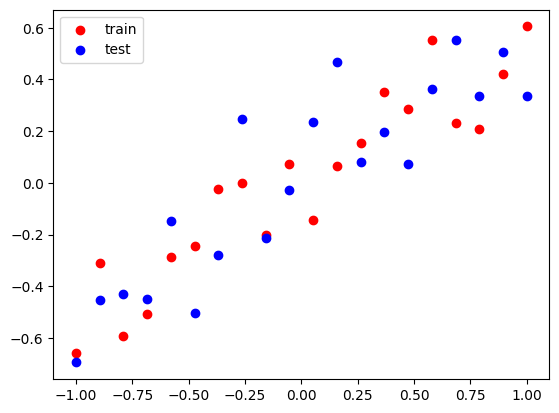

In [7]:
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')

plt.legend()
plt.show()

Regression Model

In [8]:
model=Sequential()

model.add(Dense(128,activation='relu',input_dim=1))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='linear'))

In [9]:
adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='mse',metrics=['mse'])

In [10]:
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [11]:
#Evaluate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=False)
_,test_mse=model.evaluate(X_test,y_test,verbose=False)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

Train MSE: 0.00299477344378829
Test MSE: 0.047172825783491135


In [12]:
y_pred=model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


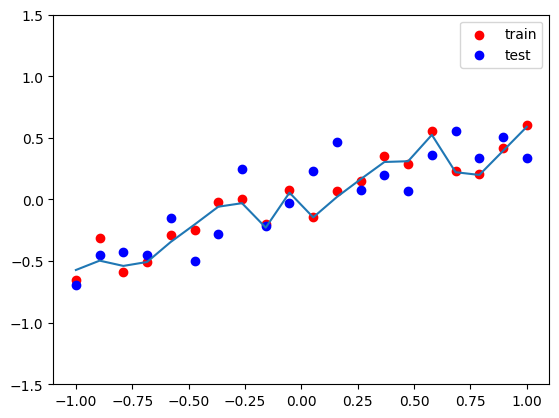

In [13]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

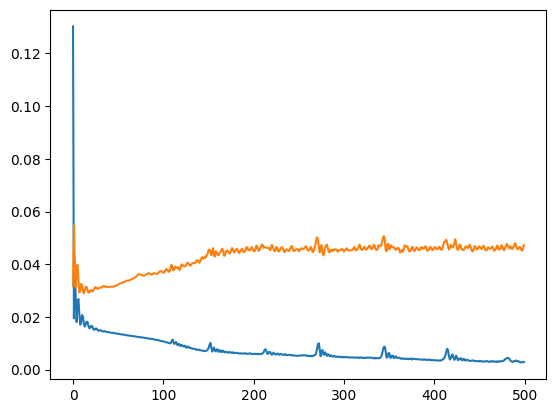

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Dropout MOdeL

In [15]:
model=Sequential()
model.add(Dense(128,activation='relu',input_dim=1))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='linear'))

adam=Adam(learning_rate=0.01)
model.compile(optimizer=adam,loss='mse',metrics=['mse'])


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=False)

In [18]:
#Evaluate the model
_,train_mse=model.evaluate(X_train,y_train,verbose=False)
_,test_mse=model.evaluate(X_test,y_test,verbose=False)
print('Train MSE:',train_mse)
print('Test MSE:',test_mse)

Train MSE: 0.017784640192985535
Test MSE: 0.037241287529468536


In [19]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


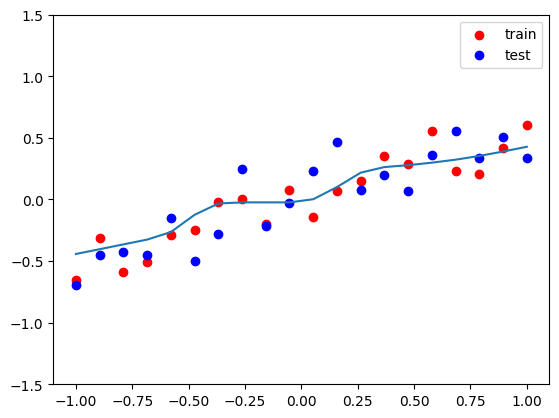

In [20]:
plt.figure()
plt.scatter(X_train,y_train,c='red',label='train')
plt.scatter(X_test,y_test,c='blue',label='test')
plt.plot(X_test,y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

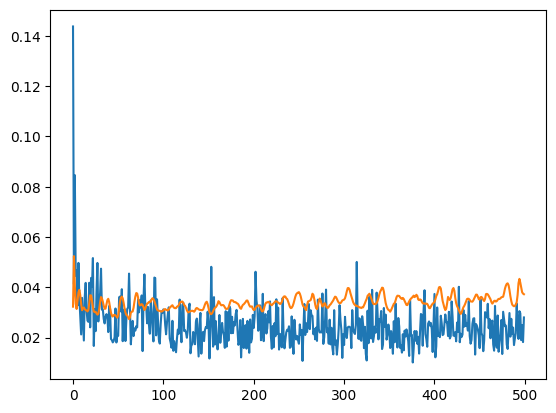

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])